In [1]:
## Imports
import tensorflow as tf
import pandas as pd
import os
import glob

In [9]:
BASE_DIR = r'C:\Users\jasproudis\Downloads\MURA-v1.1'

In [15]:
def load_image_paths_and_labels(csv_file):
    df = pd.read_csv(csv_file, names=['study', 'label'], skiprows=1)
    image_paths = []
    labels = []

    for _, row in df.iterrows():
        study_rel = row['study'].replace("MURA-v1.1/", "").replace("/", os.sep)
        study_path = os.path.join(BASE_DIR, study_rel)
        label = int(row['label'])

        pngs = glob.glob(os.path.join(study_path, "*.png"))
        for img_path in pngs:
            image_paths.append(img_path)
            labels.append(label)

    return image_paths, labels


In [16]:
train_images, train_labels = load_image_paths_and_labels(
    r'C:\Users\jasproudis\Downloads\MURA-v1.1\train_labeled_studies.csv'
)
val_images, val_labels = load_image_paths_and_labels(
    r'C:\Users\jasproudis\Downloads\MURA-v1.1\valid_labeled_studies.csv'
)

print("Train samples:", len(train_images))
print("Validation samples:", len(val_images))

Train samples: 36805
Validation samples: 3193


In [17]:
## Preprocessing function
def preprocess_image(file_path, label):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image, channels=1)  # MURA is grayscale
    image = tf.image.resize(image, [224, 224])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

## Build datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.map(preprocess_image).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_ds = val_ds.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)

In [19]:
import pickle

# Save training image paths and labels
with open('mura_train.pkl', 'wb') as f:
    pickle.dump((train_images, train_labels), f)

# Save validation image paths and labels
with open('mura_val.pkl', 'wb') as f:
    pickle.dump((val_images, val_labels), f)


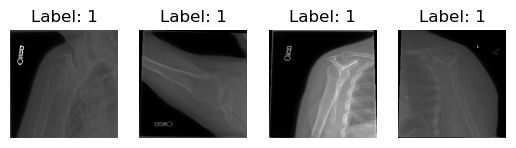

In [20]:
import matplotlib.pyplot as plt

# Sample preview
sample_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
sample_ds = sample_ds.map(preprocess_image).batch(4)

for images, labels in sample_ds.take(1):
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(tf.squeeze(images[i]), cmap='gray')
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis('off')
    plt.show()
